# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewa Tri Wijaya
- **Email:** dewatwc@gmail.com
- **ID Dicoding:** Dewa Tri Wijaya

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan signifikan dalam penggunaan sepeda pada hari kerja dibandingkan akhir pekan?

- Kapan waktu puncak penggunaan sepeda berdasarkan hari dan musim?

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [39]:
pip install numpy pandas matplotlib seaborn

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [41]:
day_csv = pd.read_csv("data/day.csv")
day_csv.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel `day_csv`

In [42]:
day_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
day_csv.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", day_csv.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
day_csv.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [46]:
day_csv.duplicated().sum()

np.int64(0)

In [47]:
day_csv.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [48]:
# Mengubah data mnth menjadi kategori example: 1 -> January
day_csv['mnth'] = day_csv['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

# Mengubah data weekday menjadi kategori example: 0 -> Sunday
day_csv['weekday'] = day_csv['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

# Mengubah data season menjadi kategori example: 1 -> Spring
day_csv['season'] = day_csv['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mengubah data yr menjadi kategori example: 0 -> 2011
day_csv['yr'] = day_csv['yr'].map({0:2011, 1:2012})

# Mengubah data holiday menjadi kategori example: 0 -> No
day_csv['holiday'] = day_csv['holiday'].map({0:'No', 1:'Yes'})

# Mengubah data workingday menjadi kategori example: 0 -> No
day_csv['workingday'] = day_csv['workingday'].map({0:'No', 1:'Yes'})


print(day_csv['mnth'])
# Save the modified DataFrame to a new CSV file
day_csv.to_csv("dashboard/modified_day.csv", index=False)


0       January
1       January
2       January
3       January
4       January
         ...   
726    December
727    December
728    December
729    December
730    December
Name: mnth, Length: 731, dtype: object


## Exploratory Data Analysis (EDA)

### Explore `day_csv`

In [49]:
day_csv.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
364,365,2011-12-31,Spring,2011,December,No,Saturday,No,1,0.410000,0.414121,0.615833,0.220154,665,1820,2485
88,89,2011-03-30,Summer,2011,March,No,Wednesday,Yes,2,0.300000,0.297350,0.646667,0.172888,168,1368,1536
616,617,2012-09-08,Fall,2012,September,No,Saturday,No,2,0.659167,0.611121,0.799167,0.281104,1557,4419,5976
275,276,2011-10-03,Winter,2011,October,No,Monday,Yes,2,0.384167,0.392046,0.760833,0.083346,330,3240,3570
415,416,2012-02-20,Spring,2012,February,Yes,Monday,No,1,0.280000,0.273391,0.507826,0.229083,502,2627,3129


In [50]:
day_csv.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,Fall,NaN,January,No,Saturday,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,105,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [51]:
day_csv.instant.is_unique

True

In [52]:
day_csv.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [53]:
day_csv.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ]
})

instant casual                             
           nunique    max min         mean         std
workingday                                            
No             231   3410  54  1371.134199  873.064794
Yes            500   2469   2   606.570000  391.496032

In [54]:
day_csv.groupby(by="workingday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std", ]
})

instant registered                               
           nunique        max  min         mean          std
workingday                                                  
No             231       5966  451  2959.034632  1293.867686
Yes            500       6946   20  3978.250000  1568.692453

In [55]:
day_csv.groupby(['weekday', 'season'])['cnt'].mean().reset_index()

,weekday,season,cnt
0,Friday,Fall,5750.629630
1,Friday,Spring,2856.307692
2,Friday,Summer,5222.769231
3,Friday,Winter,4898.680000
4,Monday,Fall,5627.192308
5,Monday,Spring,2452.730769
6,Monday,Summer,4565.000000
7,Monday,Winter,4698.846154
8,Saturday,Fall,5584.962963
9,Saturday,Spring,2432.333333


In [56]:
print("Statistik Deskriptif Keseluruhan:")
print(day_csv['cnt'].describe())

print("\nStatistik Deskriptif Berdasarkan Tipe Hari:")
print(day_csv.groupby('workingday')['cnt'].describe())


Statistik Deskriptif Keseluruhan:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

Statistik Deskriptif Berdasarkan Tipe Hari:
            count         mean          std    min      25%     50%     75%  \
workingday                                                                    
No          231.0  4330.168831  2052.141245  605.0  2710.50  4459.0  5907.5   
Yes         500.0  4584.820000  1878.415583   22.0  3344.25  4582.0  5987.5   

               max  
workingday          
No          8714.0  
Yes         8362.0  


In [57]:
day_csv.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
Yes    500
No     231
Name: instant, dtype: int64

In [58]:
day_csv.groupby("workingday")["cnt"].mean()

workingday
No     4330.168831
Yes    4584.820000
Name: cnt, dtype: float64

In [59]:
day_csv.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
628,629,2012-09-20,Fall,2012,September,No,Thursday,Yes,1,0.546667,0.532192,0.618333,0.118167,939,6781,7720
180,181,2011-06-30,Fall,2011,June,No,Thursday,Yes,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515
10,11,2011-01-11,Spring,2011,January,No,Tuesday,Yes,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
606,607,2012-08-29,Fall,2012,August,No,Wednesday,Yes,1,0.685000,0.635733,0.552083,0.112562,1177,6520,7697
390,391,2012-01-26,Spring,2012,January,No,Thursday,Yes,2,0.341667,0.356050,0.769583,0.073396,244,3831,4075


In [60]:
day_csv.groupby("weekday")["cnt"].sum()

weekday
Friday       487790
Monday       455503
Saturday     477807
Sunday       444027
Thursday     485395
Tuesday      469109
Wednesday    473048
Name: cnt, dtype: int64

In [61]:
total_casual = day_csv["casual"].sum()
total_registered = day_csv["registered"].sum()
total_cnt = day_csv["cnt"].sum()

print("Total Casual: ", total_casual)
print("Total Registered: ", total_registered)
print("Total Cnt: ", total_cnt)

Total Casual:  620017
Total Registered:  2672662
Total Cnt:  3292679


## Visualization & Explanatory Analysis

### Pertanyaan 1:

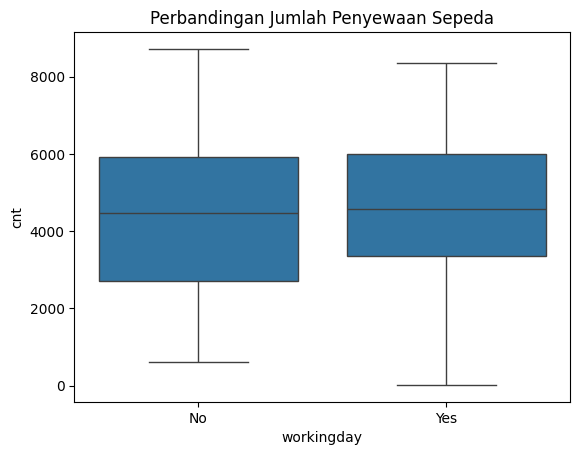

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='workingday', y='cnt', data=day_csv)
plt.title('Perbandingan Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:

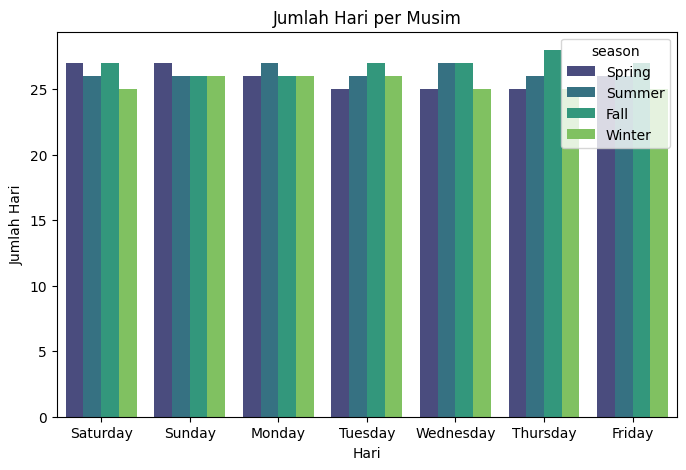

In [63]:
# membuat hubungan antara hari dan musim
plt.figure(figsize=(8, 5))
sns.countplot(x='weekday', hue='season', data=day_csv, palette='viridis')
plt.title('Jumlah Hari per Musim')
plt.xlabel('Hari')
plt.ylabel('Jumlah Hari')
plt.show()




### Pertanyaan 3:

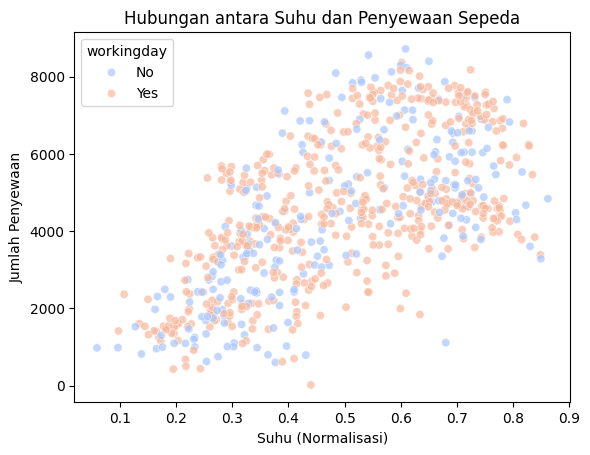

C:\Users\dewat\AppData\Local\Temp\ipykernel_11136\202641946.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_avg, palette='Blues_d')


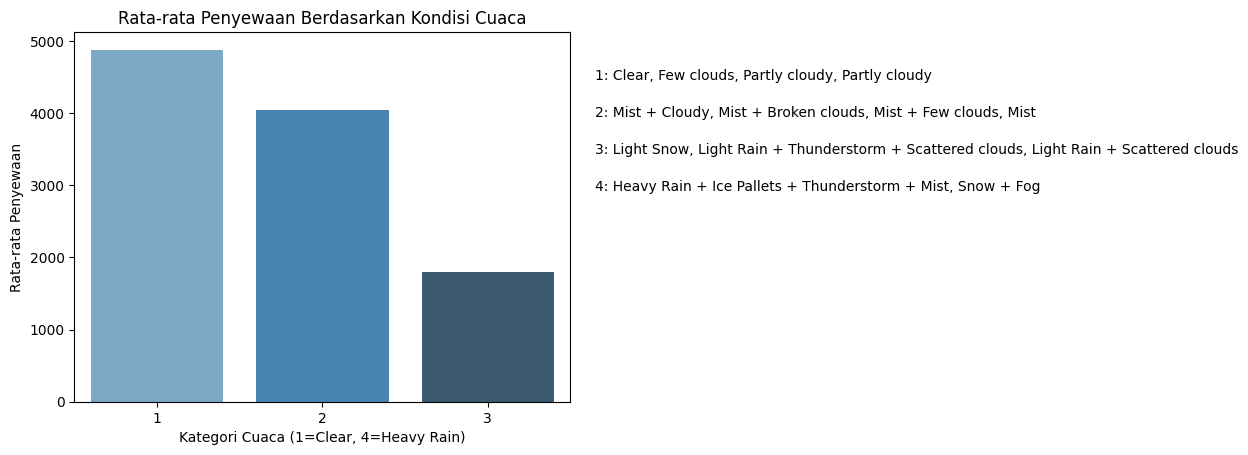

In [64]:
# Scatter plot: suhu vs penyewaan
sns.scatterplot(data=day_csv, x='temp', y='cnt', hue='workingday', alpha=0.7, palette='coolwarm')
plt.title('Hubungan antara Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Bar chart: rata-rata penyewaan berdasarkan cuaca
weather_avg = day_csv.groupby('weathersit')['cnt'].mean().reset_index()
sns.barplot(x='weathersit', y='cnt', data=weather_avg, palette='Blues_d')
plt.title('Rata-rata Penyewaan Berdasarkan Kondisi Cuaca')
plt.xlabel('Kategori Cuaca (1=Clear, 4=Heavy Rain)')
plt.ylabel('Rata-rata Penyewaan')
# Add custom legend
weather_legend = [
    "1: Clear, Few clouds, Partly cloudy, Partly cloudy",
    "2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    "3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    "4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
]

# Create a legend with the weather categories
for i, text in enumerate(weather_legend, start=1):
    plt.text(1.05, 1 - (i * 0.1), text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

## Conclusion

### Kesimpulan Pertanyaan
- Apakah ada perbedaan signifikan dalam penggunaan sepeda pada hari kerja dibandingkan akhir pekan?
    kesimpulan dari pertanyaan berikut bahwa hasil dari analisis menandakan bahwa ada perbedaan signifikan dalam penggunaan sepeda pada hari kerja dan akhir pekan. yang kebanyakan penyewaaan terbanyak ada di akhir pekan di bandingkan hari kerja.

    Dari kesimpulan berikut kita bisa memberikan saran bahwa tempat penyewaan sepeda bisa ditingkatkan layanan nya pada akhir pekan.


- Kapan waktu puncak penggunaan sepeda berdasarkan hari dan musim?
    untuk puncak penggunaan sepeda berdasarkan hari dan musim rata-rata hampir sama tidak ada perbedaan signifikan.

    Dari Kesimpulan bahwa musim tidak memengaruhi penyewaan sepeda setiap harinya.

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
    Rata-rata penyewaan tertinggi berdasarkan cuaca saat clear,few cloud, partly cloud, partly cloudy.

    Dari kesimpulan bahwa rata-rata penyewaan sepeda tertinggi yang berdasarkan cuaca saat clear,few cloud, partly cloud, partly cloudy

### Kesimpulan Tambahan
 - Total User Penyewaan Sepeda 3.292.679 berdasarkan yang teregister dan juga casual
 - Total jumlah penyewaan sepeda selama periode analisis adalah 3.292.679 yang di antaranya user casual 620.017 dan user register 2.672.662. Ini menunjukkan bahwa sebagian besar penyewaan dilakukan oleh pengguna yang memiliki keanggotaan resmi.
